# PyGamma15 statistics tutorial

Welcome to the PyGamma15 statistics tutorial!

The actual tutorial will consist of an IPython notebook
with some descriptions and code to get you started,
and instructions / excercises where you get to implement
a statistical analysis.

This IPython notebook is not the actual tutorial,
it's just here for you to check if you have all the
required software installed and working.

Please install all the packages mentioned here
and then execute the code below to verify that
everything works **before the workshop or at least
before the tutorial**.

For further information see the description [here](https://github.com/gammapy/PyGamma15/blob/gh-pages/tutorials/analysis-stats/README.md).

## Scientific Python packages

You'll need numpy, pandas, scipy and matplotlib.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

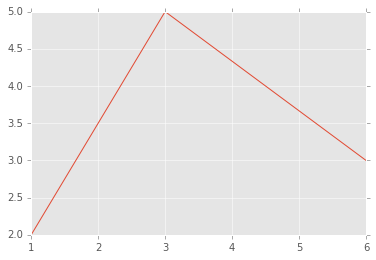

In [2]:
plt.plot([1, 3, 6], [2, 5, 3]);

## iminuit

Let's see if the first example from the [iminuit docs](http://iminuit.readthedocs.org/en/latest/) works ...

In [3]:
from iminuit import Minuit

def f(x, y, z):
    return (x - 2) ** 2 + (y - 3) ** 2 + (z - 4) ** 2

m = Minuit(f, pedantic=False, print_level=0)
m.migrad()
print(m.values)  # {'x': 2,'y': 3,'z': 4}
print(m.errors)  # {'x': 1,'y': 1,'z': 1}

{'x': 2.0000000000047327, 'z': 4.000000000009465, 'y': 3.000000000007099}
{'x': 1.0000000000000409, 'z': 0.9999999999998322, 'y': 1.0000000000002762}


## emcee

Same for [emcee](http://dan.iel.fm/emcee/current/) ... let's see if the first example from the docs works.

(You don't have to understand what this does for now ... just check if it runs for you without error.)

In [4]:
import emcee

def lnprob(x, ivar):
    return -0.5 * np.sum(ivar * x ** 2)

ndim, nwalkers = 10, 100
ivar = 1. / np.random.rand(ndim)
p0 = [np.random.rand(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[ivar])
samples = sampler.run_mcmc(p0, 1000)

## uncertainties

We might also use the [uncertainties](http://pythonhosted.org/uncertainties/) package for error propagation. So please install that as well ...

In [5]:
from uncertainties import ufloat
x = ufloat(1, 0.1)
print(2 * x)

2.00+/-0.20
